# This notebook finds country in each continent which showed the sharpest increase in population from 2000 to 2020 using the dataset provided in `data/world_population.csv`

In [1]:
# Importing the dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the csv file as a dataframe
df = pd.read_csv('data/world_population.csv')

In [3]:
# checking out the dataframe
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
# checking all the columns
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [5]:
# Making a copy of df
df2 = df

# Adding a new column to df2 which will contain the % of population increase b/w 2000 & 2020 for all countries
df2['population increase in %'] = 100*(df2['2020 Population'] - df2['2000 Population'])/ df2['2000 Population']
df2['population increase in %'] = np.round(df2['population increase in %'] ,decimals = 2)

In [75]:
# Grouping the dataframe by 'Continent' and checking the max of 'population increase in %' column
mpop = df2.groupby(['Continent']).max()[['population increase in %']]
mpop = mpop.reset_index()
mpop

,Continent,population increase in %
0,Africa,133.01
1,Asia,327.35
2,Europe,44.71
3,North America,136.21
4,Oceania,77.00
5,South America,77.04


In [85]:
# converting the 'mpop' dataframe values into tuple pairs so we can iterate over them
tuple(map(tuple ,np.array(mpop)))

(('Africa', 133.01),
 ('Asia', 327.35),
 ('Europe', 44.71),
 ('North America', 136.21),
 ('Oceania', 77.0),
 ('South America', 77.04))

In [90]:
# An example of what we are going to do in the next code cell below
('Oceania', 75.0) in tuple(map(tuple ,np.array(mpop)))

False

In [95]:
# iterating over df2 and check if corresponding value matches with the value in above tuple mpop
bool = []
for i in tuple(map(tuple, np.array(df2[['Continent' , 'population increase in %']]))) :
   bool.append(i in tuple(map(tuple ,np.array(mpop))) )

In [97]:
bool[:5]

[False, False, False, False, False]

In [98]:
# index on the rows where bool values are True
max_pop_increase = df2[bool]
max_pop_increase

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population increase in %
59,152,GNQ,Equatorial Guinea,Malabo,Africa,1674908,1596049,1346973,1094524,684977,465549,282509,316955,28051,59.7094,1.0247,0.02,133.01
69,184,GUF,French Guiana,Cayenne,South America,304557,290969,257026,228453,164351,113931,66825,46484,83534,3.6459,1.0239,0.00,77.04
118,168,LUX,Luxembourg,Luxembourg,Europe,647599,630399,569408,507070,435628,381267,363741,339342,2586,250.4250,1.0129,0.01,44.71
160,93,PNG,Papua New Guinea,Port Moresby,Oceania,10142619,9749640,8682174,7583269,5508297,3864972,3104788,2489059,462840,21.9139,1.0194,0.13,77.00
167,143,QAT,Qatar,Doha,Asia,2695122,2760385,2414573,1713504,645937,441675,277450,118007,11586,232.6189,1.0026,0.03,327.35
215,212,TCA,Turks and Caicos Islands,Cockburn Town,North America,45703,44276,36538,29726,18744,11709,7598,5665,948,48.2099,1.0131,0.00,136.21


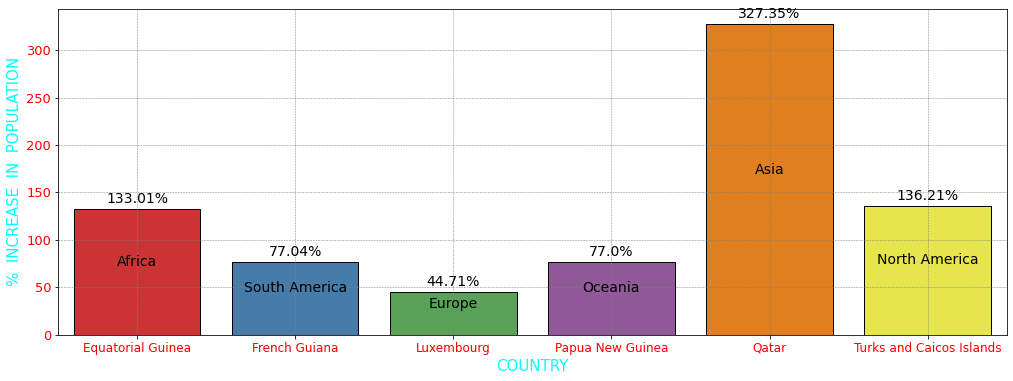

In [103]:
# Plotting the countries with max population increase per continent in a barplot

plt.figure(figsize=(17,6))
plt.xticks(color = 'red' ,size = 12)
plt.yticks(color = 'red' ,size = 13)

ax = sns.barplot(x = max_pop_increase['Country'] ,y = max_pop_increase['population increase in %'] 
            ,palette = 'Set1' ,edgecolor='black')

plt.xlabel('COUNTRY' ,color = 'cyan',size = 15)
plt.ylabel('%  INCREASE  IN  POPULATION' ,color = 'cyan' ,size = 15)

plt.grid(b = True ,
         linewidth = 0.5,
         linestyle = '--',
         color = 'gray')

for bar in ax.patches:
       ax.annotate( s = str(bar.get_height()) + '%', # the text to put
                    xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center',
                    va='center',
                    size=14,
                    xytext=(0, 10),
                    textcoords='offset points')
       
for i,bar in enumerate(ax.patches):
       ax.annotate( s = max_pop_increase['Continent'].iloc[i], # the text to put
                    xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()/2),
                    ha='center',
                    va='center',
                    size=14,
                    xytext=(0, 10),
                    textcoords='offset points')      